In [45]:
import numpy as np 
import pandas as pd 

## K-means clustering

In [46]:
df = pd.read_csv("mushrooms.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [47]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [48]:
# check NULL values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [49]:
# Convert categorical values into integers
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])

In [50]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [42]:
len(np.unique(y_train))

2

In [43]:
# training and test samples
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3)
x_train = train.iloc[:,1:23]
y_train = train.iloc[:,0]
x_test = test.iloc[:,1:23]
y_test = test.iloc[:,0]

In [44]:
# scale the data to normal distribution
from sklearn.preprocessing import scale
x_train = scale(x_train)

In [41]:
# model
from sklearn import cluster
clf = cluster.KMeans(init='k-means++',n_clusters=2, random_state=5)
clf.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [42]:
# use test sample to generate predictions
y_pred=clf.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 1, 1])

In [43]:
# Evaluating the model
# Adjusted rand index: A measure of the similarity between two groups
# 0.0 indicates that there is no similarity and any overlap is explainable as totally random
# 1.0 indicates that the two groups are identical
from sklearn import metrics
print("Adjusted rand score: {0:2}".format(metrics.adjusted_rand_score(y_test, y_pred)))

Adjusted rand score: 0.1470642014083677


In [44]:
print(metrics.confusion_matrix(y_test, y_pred))

[[ 119 1121]
 [ 566  632]]


## Logistic Regression

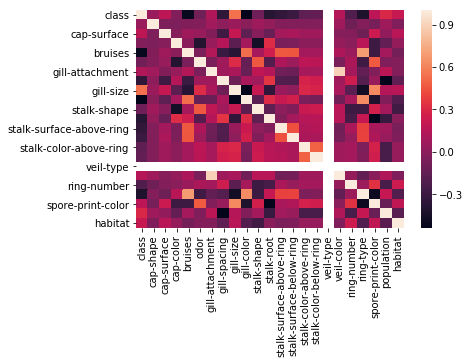

In [24]:
import matplotlib.pyplot as plot
%matplotlib inline
sb.heatmap(df.corr()) 
plot.show()

In [51]:
df = df.drop(["veil-type"],axis=1)

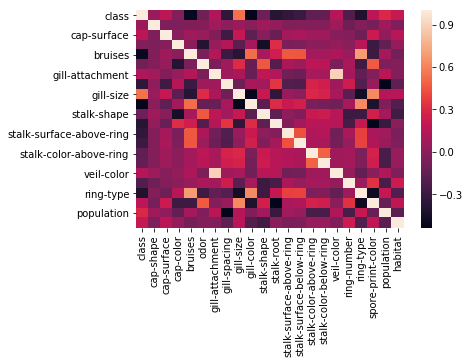

In [31]:
import matplotlib.pyplot as plot
%matplotlib inline
sb.heatmap(df.corr()) 
plot.show()

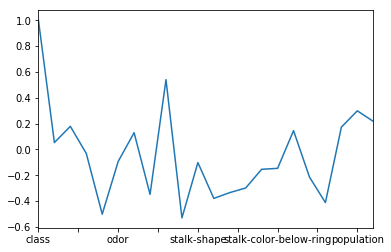

In [33]:
df.corr().iloc[:,0].plot()

In [54]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3)
x_train = train.iloc[0:,1:22]
y_train = train.iloc[:,0]
x_test = test.iloc[0:,1:22]
y_test = test.iloc[:,0]

In [55]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred_training = model.predict(x_train)
y_pred_testing = model.predict(x_test)
training_msq = mean_squared_error(y_pred_training,y_train)
testing_msq = mean_squared_error(y_pred_testing,y_test)
print(training_msq,testing_msq)

0.0653879682556 0.0614386846935


In [57]:
print('Train R-Square:',r2_score(y_train,y_pred_training))
print('Test R-Square:',r2_score(y_test,y_pred_testing))

Train R-Square: 0.738084027551
Test R-Square: 0.753980360988


In [58]:
from sklearn.metrics import roc_curve, auc

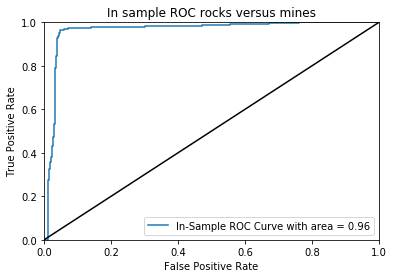

In [59]:
import matplotlib.pyplot as plt
(fpr, tpr, thresholds) = roc_curve(y_train,y_pred_training)
area = auc(fpr,tpr)
plt.clf() #Clear the current figure
plt.plot(fpr,tpr,label="In-Sample ROC Curve with area = %1.2f"%area)

plt.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability line)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('In sample ROC rocks versus mines')
plt.legend(loc="lower right")
plt.show()

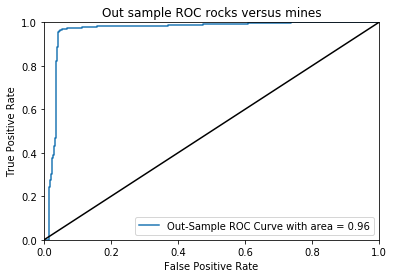

In [60]:
(fpr, tpr, thresholds) = roc_curve(y_test,y_pred_testing)
area = auc(fpr,tpr)
plt.clf() #Clear the current figure
plt.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

plt.plot([0, 1], [0, 1], 'k')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Out sample ROC rocks versus mines')
plt.legend(loc="lower right")
plt.show()

## Classification trees

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth = 3,criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [65]:
from sklearn.metrics import confusion_matrix
p_train=model.predict(x_train)
p_test = model.predict(x_test)
print(confusion_matrix(p_train,np.array(y_train)))
print(confusion_matrix(p_test,np.array(y_test)))

[[2783   79]
 [ 166 2658]]
[[1185   29]
 [  74 1150]]


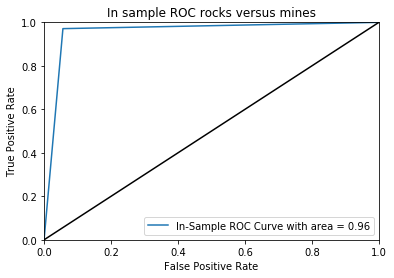

In [66]:
from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline
(fpr, tpr, thresholds) = roc_curve(y_train,p_train)
area = auc(fpr,tpr)
pl.clf() #Clear the current figure
pl.plot(fpr,tpr,label="In-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability line)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('In sample ROC rocks versus mines')
pl.legend(loc="lower right")
pl.show()

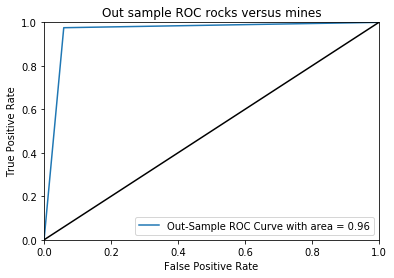

In [67]:
from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline
(fpr, tpr, thresholds) = roc_curve(y_test,p_test)
area = auc(fpr,tpr)
pl.clf() #Clear the current figure
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability line)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Out sample ROC rocks versus mines')
pl.legend(loc="lower right")
pl.show()

## Random forests

In [68]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train,np.ravel(y_train))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [69]:
model.score(x_test,y_test)

1.0

In [74]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cfm = confusion_matrix(np.ravel(y_test),y_pred)
cfm

array([[1259,    0],
       [   0, 1179]])

Text(0.5,0,'Relative Importance')

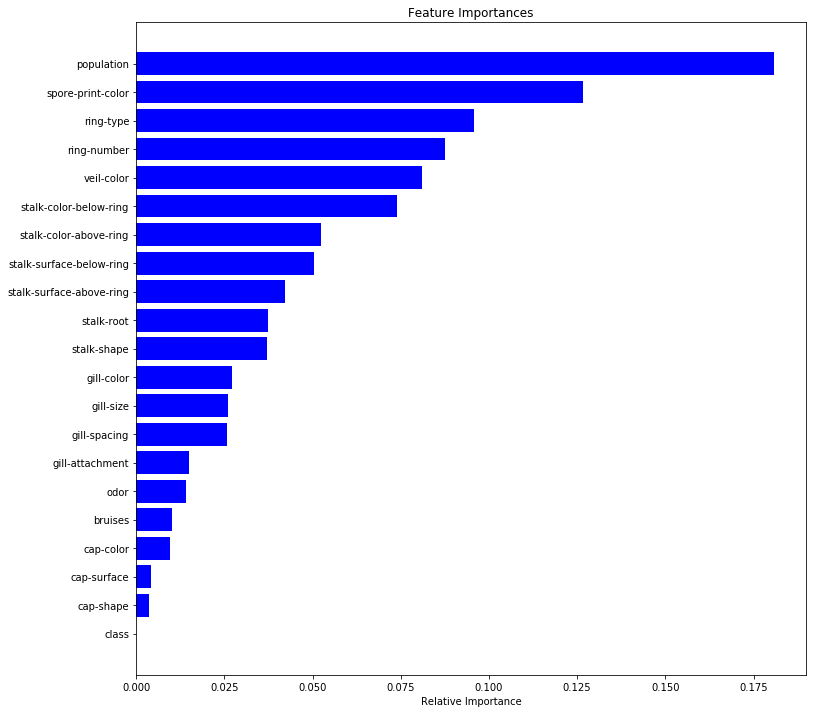

In [71]:
# For each feature, the model calculates by how much entropy decreases (net across levels) by selecting it
import matplotlib.pyplot as plt
%matplotlib inline
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),feature_names)
plt.xlabel('Relative Importance')

In [72]:
from sklearn.model_selection import GridSearchCV
parameters = {
     'n_estimators':(10, 30, 50), #the number of trees
     'max_depth':(4,5,6,8,10,15),
     'min_samples_split': (2, 4, 8),
     'min_samples_leaf': (4,8,12,16)
}

model = GridSearchCV(RandomForestClassifier(),parameters)
model.fit(x_train, np.ravel(y_train))
model.best_score_, model.best_params_

(1.0,
 {'max_depth': 8,
  'min_samples_leaf': 4,
  'min_samples_split': 2,
  'n_estimators': 50})

In [73]:
b_model = RandomForestClassifier(max_depth=4,min_samples_leaf=4,min_samples_split=8,n_estimators=50)
b_model.fit(x_train,np.ravel(y_train))
from sklearn.metrics import confusion_matrix
y_pred = b_model.predict(x_test)
cfm = confusion_matrix(np.ravel(y_test),y_pred)
cfm

array([[1259,    0],
       [  22, 1157]])

In [81]:
p_train = b_model.predict(x_train)

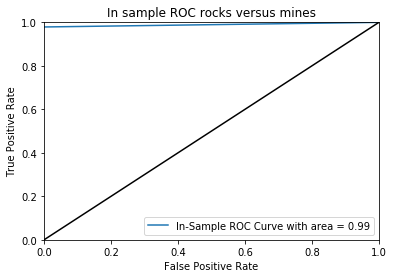

In [82]:
from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline
(fpr, tpr, thresholds) = roc_curve(y_train,p_train)
area = auc(fpr,tpr)
pl.clf() #Clear the current figure
pl.plot(fpr,tpr,label="In-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability line)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('In sample ROC rocks versus mines')
pl.legend(loc="lower right")
pl.show()

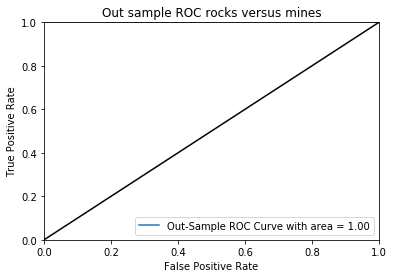

In [83]:
from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline
(fpr, tpr, thresholds) = roc_curve(y_test,y_pred)
area = auc(fpr,tpr)
pl.clf() #Clear the current figure
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability line)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Out sample ROC rocks versus mines')
pl.legend(loc="lower right")
pl.show()